# Small Image Classification Using Convolutional Neural Network (CNN)


In [8]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as pt

In [24]:
# Load the dataset
(X_train, y_train),(X_test, y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [25]:
X_test.shape

(10000, 32, 32, 3)

In [26]:
y_train.shape

(50000, 1)

In [27]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [31]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [32]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [36]:
classes[0]

'airplane'

In [42]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15, 2))
    plt.imshow(X[index])
    plt.xlabel(classes[index])

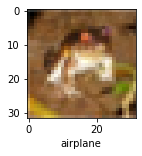

In [44]:
plot_sample(X_train, y_train, 0)

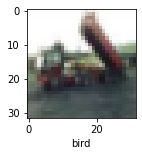

In [47]:
plot_sample(X_train, y_train, 2)

In [48]:
#Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range 
#from 0 to 255(8bit image). Hence to normalize in 0-->1 range, we need to divide it by 255.
X_train = X_train / 255.0
X_test = X_test / 255.0

In [49]:
#Build simple artificial neural network for image classification

ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 34s 21ms/step - loss: 1.8183 - accuracy: 0.3502
Epoch 2/5
1563/1563 [==============================] - 34s 22ms/step - loss: 1.6262 - accuracy: 0.4257
Epoch 3/5
1563/1563 [==============================] - 34s 22ms/step - loss: 1.5417 - accuracy: 0.4543
Epoch 4/5
1563/1563 [==============================] - 34s 22ms/step - loss: 1.4833 - accuracy: 0.4773
Epoch 5/5
1563/1563 [==============================] - 34s 22ms/step - loss: 1.4347 - accuracy: 0.4942


In [50]:
ann.evaluate(X_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 1.4890 - accuracy: 0.4688


[1.4890289306640625, 0.46880000829696655]

In [51]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.67      0.29      0.41      1000
           1       0.59      0.60      0.59      1000
           2       0.43      0.25      0.32      1000
           3       0.41      0.19      0.26      1000
           4       0.42      0.43      0.42      1000
           5       0.48      0.28      0.35      1000
           6       0.51      0.57      0.54      1000
           7       0.43      0.66      0.52      1000
           8       0.40      0.81      0.54      1000
           9       0.50      0.60      0.55      1000

    accuracy                           0.47     10000
   macro avg       0.48      0.47      0.45     10000
weighted avg       0.48      0.47      0.45     10000



In [53]:
#Now let us build a convolutional neural network to train our images

cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [54]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [55]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 20s 13ms/step - loss: 1.4650 - accuracy: 0.4716
Epoch 2/10
1563/1563 [==============================] - 20s 13ms/step - loss: 1.1093 - accuracy: 0.6138
Epoch 3/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.9813 - accuracy: 0.6600
Epoch 4/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.8965 - accuracy: 0.6890
Epoch 5/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.8327 - accuracy: 0.7107
Epoch 6/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.7753 - accuracy: 0.7294
Epoch 7/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.7235 - accuracy: 0.7493
Epoch 8/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.6844 - accuracy: 0.7615
Epoch 9/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.6456 - accuracy: 0.7752
Epoch 10/10
1563/1563 [==============================] - 20s 13m

In [56]:
# With CNN, at the end 5 epochs, accuracy was at around 70% which is a significant improvement over ANN. CNN's are best for 
# image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces
# the image dimensions while still preserving the features

In [57]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.9530 - accuracy: 0.6926


[0.9529590010643005, 0.6926000118255615]

In [58]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[2.0069360e-04, 8.3608420e-06, 2.4868341e-03, 4.5303518e-01,
        2.9600682e-04, 4.9717405e-01, 3.3791192e-02, 5.1304211e-05,
        1.2922863e-02, 3.3536722e-05],
       [4.6233565e-02, 1.9987935e-02, 4.3833650e-05, 2.5369985e-05,
        8.2787883e-06, 1.7840772e-07, 3.8768389e-06, 8.6788177e-08,
        9.3143493e-01, 2.2620703e-03],
       [5.1996429e-02, 1.6483647e-01, 6.4903777e-04, 1.5180502e-02,
        9.6181752e-03, 4.6470019e-04, 1.4603098e-03, 1.4574258e-03,
        7.2403842e-01, 3.0298484e-02],
       [8.3496350e-01, 2.6001904e-02, 8.7361047e-03, 3.1937337e-03,
        2.0987925e-03, 6.0252158e-05, 3.9922717e-04, 2.1780699e-05,
        1.2419375e-01, 3.3096480e-04],
       [1.9035554e-06, 3.9984625e-06, 2.9417514e-03, 6.6930177e-03,
        6.8423122e-01, 4.2822483e-04, 3.0564928e-01, 3.1926563e-06,
        4.7183075e-05, 2.4223019e-07]], dtype=float32)

In [59]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[5, 8, 8, 0, 4]

In [60]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [61]:
plot_sample(X_test, y_test,3)

In [62]:
classes[y_classes[3]]

'airplane'